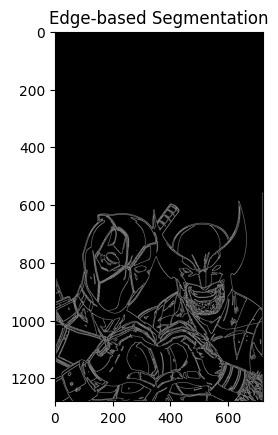

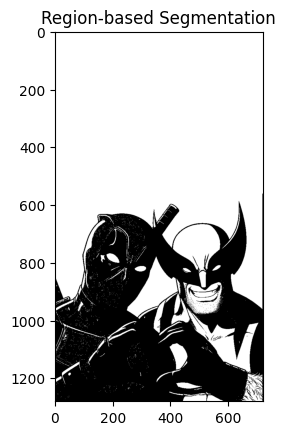

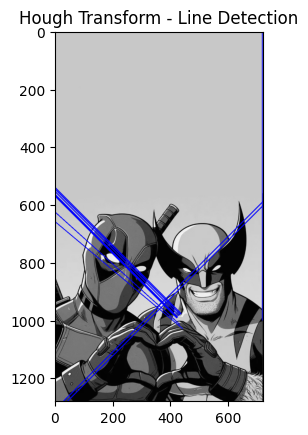

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-2-18 Python-3.11.11 torch-2.5.1+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 103MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


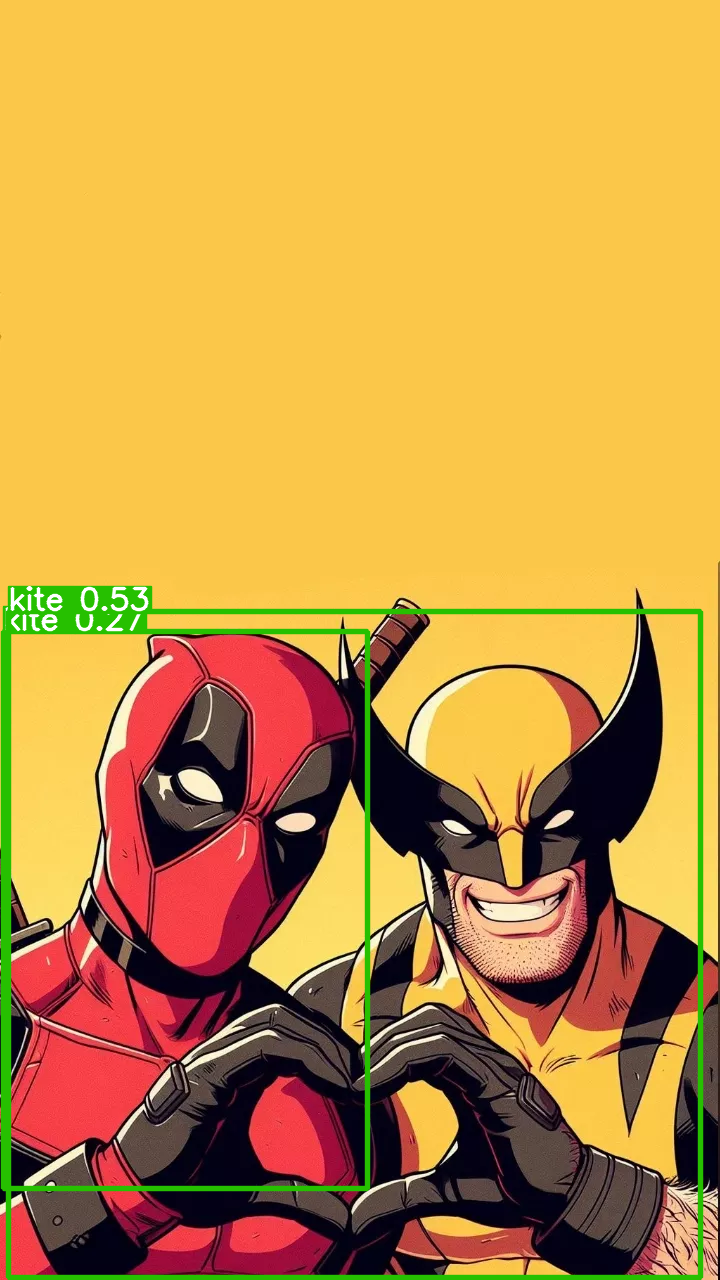

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 130MB/s]


[{'boxes': tensor([[6.95263e+01, 6.02583e+02, 7.03907e+02, 1.26998e+03],
        [2.29423e+02, 5.83439e+02, 7.01726e+02, 1.10756e+03],
        [1.29689e+01, 6.08906e+02, 4.82664e+02, 1.16789e+03],
        [3.44926e+02, 5.89719e+02, 6.54451e+02, 9.24202e+02],
        [1.39867e+01, 6.13588e+02, 4.73220e+02, 1.13403e+03],
        [1.09677e+01, 9.55550e+02, 5.28918e+02, 1.27423e+03],
        [3.31827e+02, 6.02698e+02, 6.76649e+02, 9.68811e+02],
        [3.59442e+02, 5.96917e+02, 6.42967e+02, 9.07143e+02],
        [1.54845e+02, 9.98772e+02, 4.46124e+02, 1.26275e+03],
        [1.76933e+01, 6.02129e+02, 4.21175e+02, 1.15014e+03],
        [5.52936e+02, 5.87436e+02, 6.64146e+02, 8.56179e+02],
        [3.41620e+02, 9.34585e+02, 3.83045e+02, 1.04107e+03],
        [2.00555e+01, 7.67889e+02, 6.99528e+02, 1.26620e+03],
        [6.74973e+02, 9.92179e+02, 7.18416e+02, 1.20385e+03],
        [6.13298e-01, 5.92938e+02, 6.74971e+02, 1.27338e+03],
        [1.30862e+01, 6.16083e+02, 4.14451e+02, 1.15935e+03

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist, cifar100
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

# Task 1: Image Segmentation and Object Detection using Hough Transform

def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, 0)
    edges = cv2.Canny(image, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge-based Segmentation")
    plt.show()

def region_based_segmentation(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title("Region-based Segmentation")
    plt.show()

def hough_transform(image_path):
    image = cv2.imread(image_path, 0)
    edges = cv2.Canny(image, 50, 150)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    img_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(img_color, (x1, y1), (x2, y2), (0, 0, 255), 2)

    plt.imshow(img_color)
    plt.title("Hough Transform - Line Detection")
    plt.show()

# Task 2: Object Detection using YOLO and RCNN

def yolo_object_detection(image_path):
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
    img = Image.open(image_path)
    results = model(img)
    results.show()

def rcnn_object_detection(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    transform = transforms.Compose([transforms.ToTensor()])
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)
    outputs = model(image_tensor)
    print(outputs)

# Task 3: Loading Datasets

def load_fashion_mnist():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    print(f"Fashion-MNIST: {x_train.shape}, {y_train.shape}")

def load_cifar100():
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    print(f"CIFAR-100: {x_train.shape}, {y_train.shape}")

# Example Usage
edge_based_segmentation('dandw.jpg')
region_based_segmentation('dandw.jpg')
hough_transform('dandw.jpg')
yolo_object_detection('dandw.jpg')
rcnn_object_detection('dandw.jpg')
load_fashion_mnist()
load_cifar100()